In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import math
from sklearn.metrics import roc_auc_score
from sklearn.multioutput import MultiOutputClassifier

<h3>Merging training set features and training set labels </h3>

In [2]:
train_df = pd.read_csv('/Users/anjalibharti/Downloads/dataset and all/training_set_features.csv')
label_df = pd.read_csv('/Users/anjalibharti/Downloads/dataset and all/training_set_labels.csv')
train_df = pd.merge(train_df, label_df, on='respondent_id')
train_df.head()

respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              0          1.0            0.0                        0.0   
1              1          3.0            2.0                        0.0   
2              2          1.0            1.0                        0.0   
3              3          1.0            1.0                        0.0   
4              4          2.0            1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...  rent_or_own   employment_status  \
0                    1.0  ...          Own  Not in Labor Force   
1                    1.0  ...         Rent            Employed   
2                    0.0  ...          Own            Employed   
3                    0.0  ...         Rent  Not in Labor Force   
4                    1.0  ...          Own            Employed   

   hhs_geo_region                census_msa  household_adults  \
0        oxchjgsf                   Non-MSA               0.0   
1        bhuqouqj  MSA, Not Principle  City               0.0   
2        qufhixun  MSA, Not Principle  City               2.0   
3        lrircsnp       MSA, Principle City               0.0   
4        qufhixun  MSA, Not Principle  City               1.0   

   household_children  employment_industry  employment_occupation  \
0                 0.0                  NaN                    NaN   
1                 0.0             pxcmvdjn               xgwztkwe   
2                 0.0             rucpziij               xtkaffoo   
3                 0.0                  NaN                    NaN   
4                 0.0             wxleyezf               emcorrxb   

   xyz_vaccine  seasonal_vaccine  
0            0                 0  
1            0                 1  
2            0                 0  
3            0                 1  
4            0                 0  

[5 rows x 38 columns]

In [3]:
# Dropping the respondent_id column having all unique values
train_df = train_df.drop("respondent_id", axis = 1)

<h1>Exploratory Data Analysis</h1>

<h2>Univariate Analysis</h2>

<h3>Conclusion:</h3>

1. Missing values in every column except five columns.
2. More than 45% values missing in three columns: 'health_insurance', 'employment_industry', 'employment_occupation'.
3. 'behavioral_antiviral_meds' and 'behavioral_face_mask' have more than 90% value being '0'.
4. All columns except few are either left-skewed or right-skewed.
5. There does not seem to be much outliers in any columns that needs to be removed.
6. More than 75% belong to 'White' Race.
7. Almost 76% have their 'Own' house

In [4]:
train_df.describe()

xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
count  26615.000000   26591.000000               26636.000000   
mean       1.618486       1.262532                   0.048844   
std        0.910311       0.618149                   0.215545   
min        0.000000       0.000000                   0.000000   
25%        1.000000       1.000000                   0.000000   
50%        2.000000       1.000000                   0.000000   
75%        2.000000       2.000000                   0.000000   
max        3.000000       2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  26620.00000             26625.000000   
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  doctor_recc_xyz  ...  \
count           26579.000000     24547.000000  ...   
mean                0.677264         0.220312  ...   
std                 0.467531         0.414466  ...   
min                 0.000000         0.000000  ...   
25%                 0.000000         0.000000  ...   
50%                 1.000000         0.000000  ...   
75%                 1.000000         0.000000  ...   
max                 1.000000         1.000000  ...   

       opinion_xyz_vacc_effective  opinion_xyz_risk  \
count                26316.000000      26319.000000   
mean                     3.850623          2.342566   
std                      1.007436          1.285539   
min                      1.000000          1.000000   
25%                      3.000000          1.000000   
50%                      4.000000          2.000000   
75%                      5.000000          4.000000   
max                      5.000000          5.000000   

       opinion_xyz_sick_from_vacc  opinion_seas_vacc_effective  \
count                26312.000000                 26245.000000   
mean                     2.357670                     4.025986   
std                      1.362766                     1.086565   
min                      1.000000                     1.000000   
25%                      1.000000                     4.000000   
50%                      2.000000                     4.000000   
75%                      4.000000                     5.000000   
max                      5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26193.000000                 26170.000000      26458.000000   
mean            2.719162                     2.118112          0.886499   
std             1.385055                     1.332950          0.753422   
min             1.000000                     1.000000          0.000000   
25%             2.000000                     1.000000          0.000000   
50%             2.000000                     2.000000          1.000000   
75%             4.000000                     4.000000          1.0

In [5]:
train_df.describe(include = 'object')

age_group         education   race     sex             income_poverty  \
count       26707             25300  26707   26707                      22284   
unique          5                 4      4       2                          3   
top     65+ Years  College Graduate  White  Female  <= $75,000, Above Poverty   
freq         6843             10097  21222   15858                      12777   

       marital_status rent_or_own employment_status hhs_geo_region  \
count           25299       24665             25244          26707   
unique              2           2                 3             10   
top           Married         Own          Employed       lzgpxyit   
freq            13555       18736             13560           4297   

                      census_msa employment_industry employment_occupation  
count                      26707               13377                 13237  
unique                         3                  21                    23  
top     MSA, Not Principle  City            fcxhlnwr              xtkaffoo  
freq                       11645                2468                  1778

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26615 non-null  float64
 1   xyz_knowledge                26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_xyz              24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [7]:
train_df.isnull().sum()*100/ len(train_df)

xyz_concern                     0.344479
xyz_knowledge                   0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_xyz                 8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_xyz_vacc_effective      1.464036
opinion_xyz_risk                1.452803
opinion_xyz_sick_from_vacc      1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

In [8]:
for col in range(len(train_df.columns)):
    print(train_df.iloc[:, col].value_counts()*100/len(train_df))

xyz_concern
2.0    39.596361
1.0    30.527577
3.0    17.190250
0.0    12.341334
Name: count, dtype: float64
xyz_knowledge
1.0    54.659827
2.0    35.522522
0.0     9.383308
Name: count, dtype: float64
behavioral_antiviral_meds
0.0    94.862770
1.0     4.871382
Name: count, dtype: float64
behavioral_avoidance
1.0    71.996106
0.0    27.225072
Name: count, dtype: float64
behavioral_face_mask
0.0    93.035534
1.0     6.893324
Name: count, dtype: float64
behavioral_wash_hands
1.0    82.431572
0.0    17.411166
Name: count, dtype: float64
behavioral_large_gatherings
0.0    63.927060
1.0    35.747182
Name: count, dtype: float64
behavioral_outside_home
0.0    66.065077
1.0    33.627888
Name: count, dtype: float64
behavioral_touch_face
1.0    67.401805
0.0    32.118920
Name: count, dtype: float64
doctor_recc_xyz
0.0    71.662860
1.0    20.249373
Name: count, dtype: float64
doctor_recc_seasonal
0.0    61.605572
1.0    30.306661
Name: count, dtype: float64
chronic_med_condition
0.0    69.068035
1

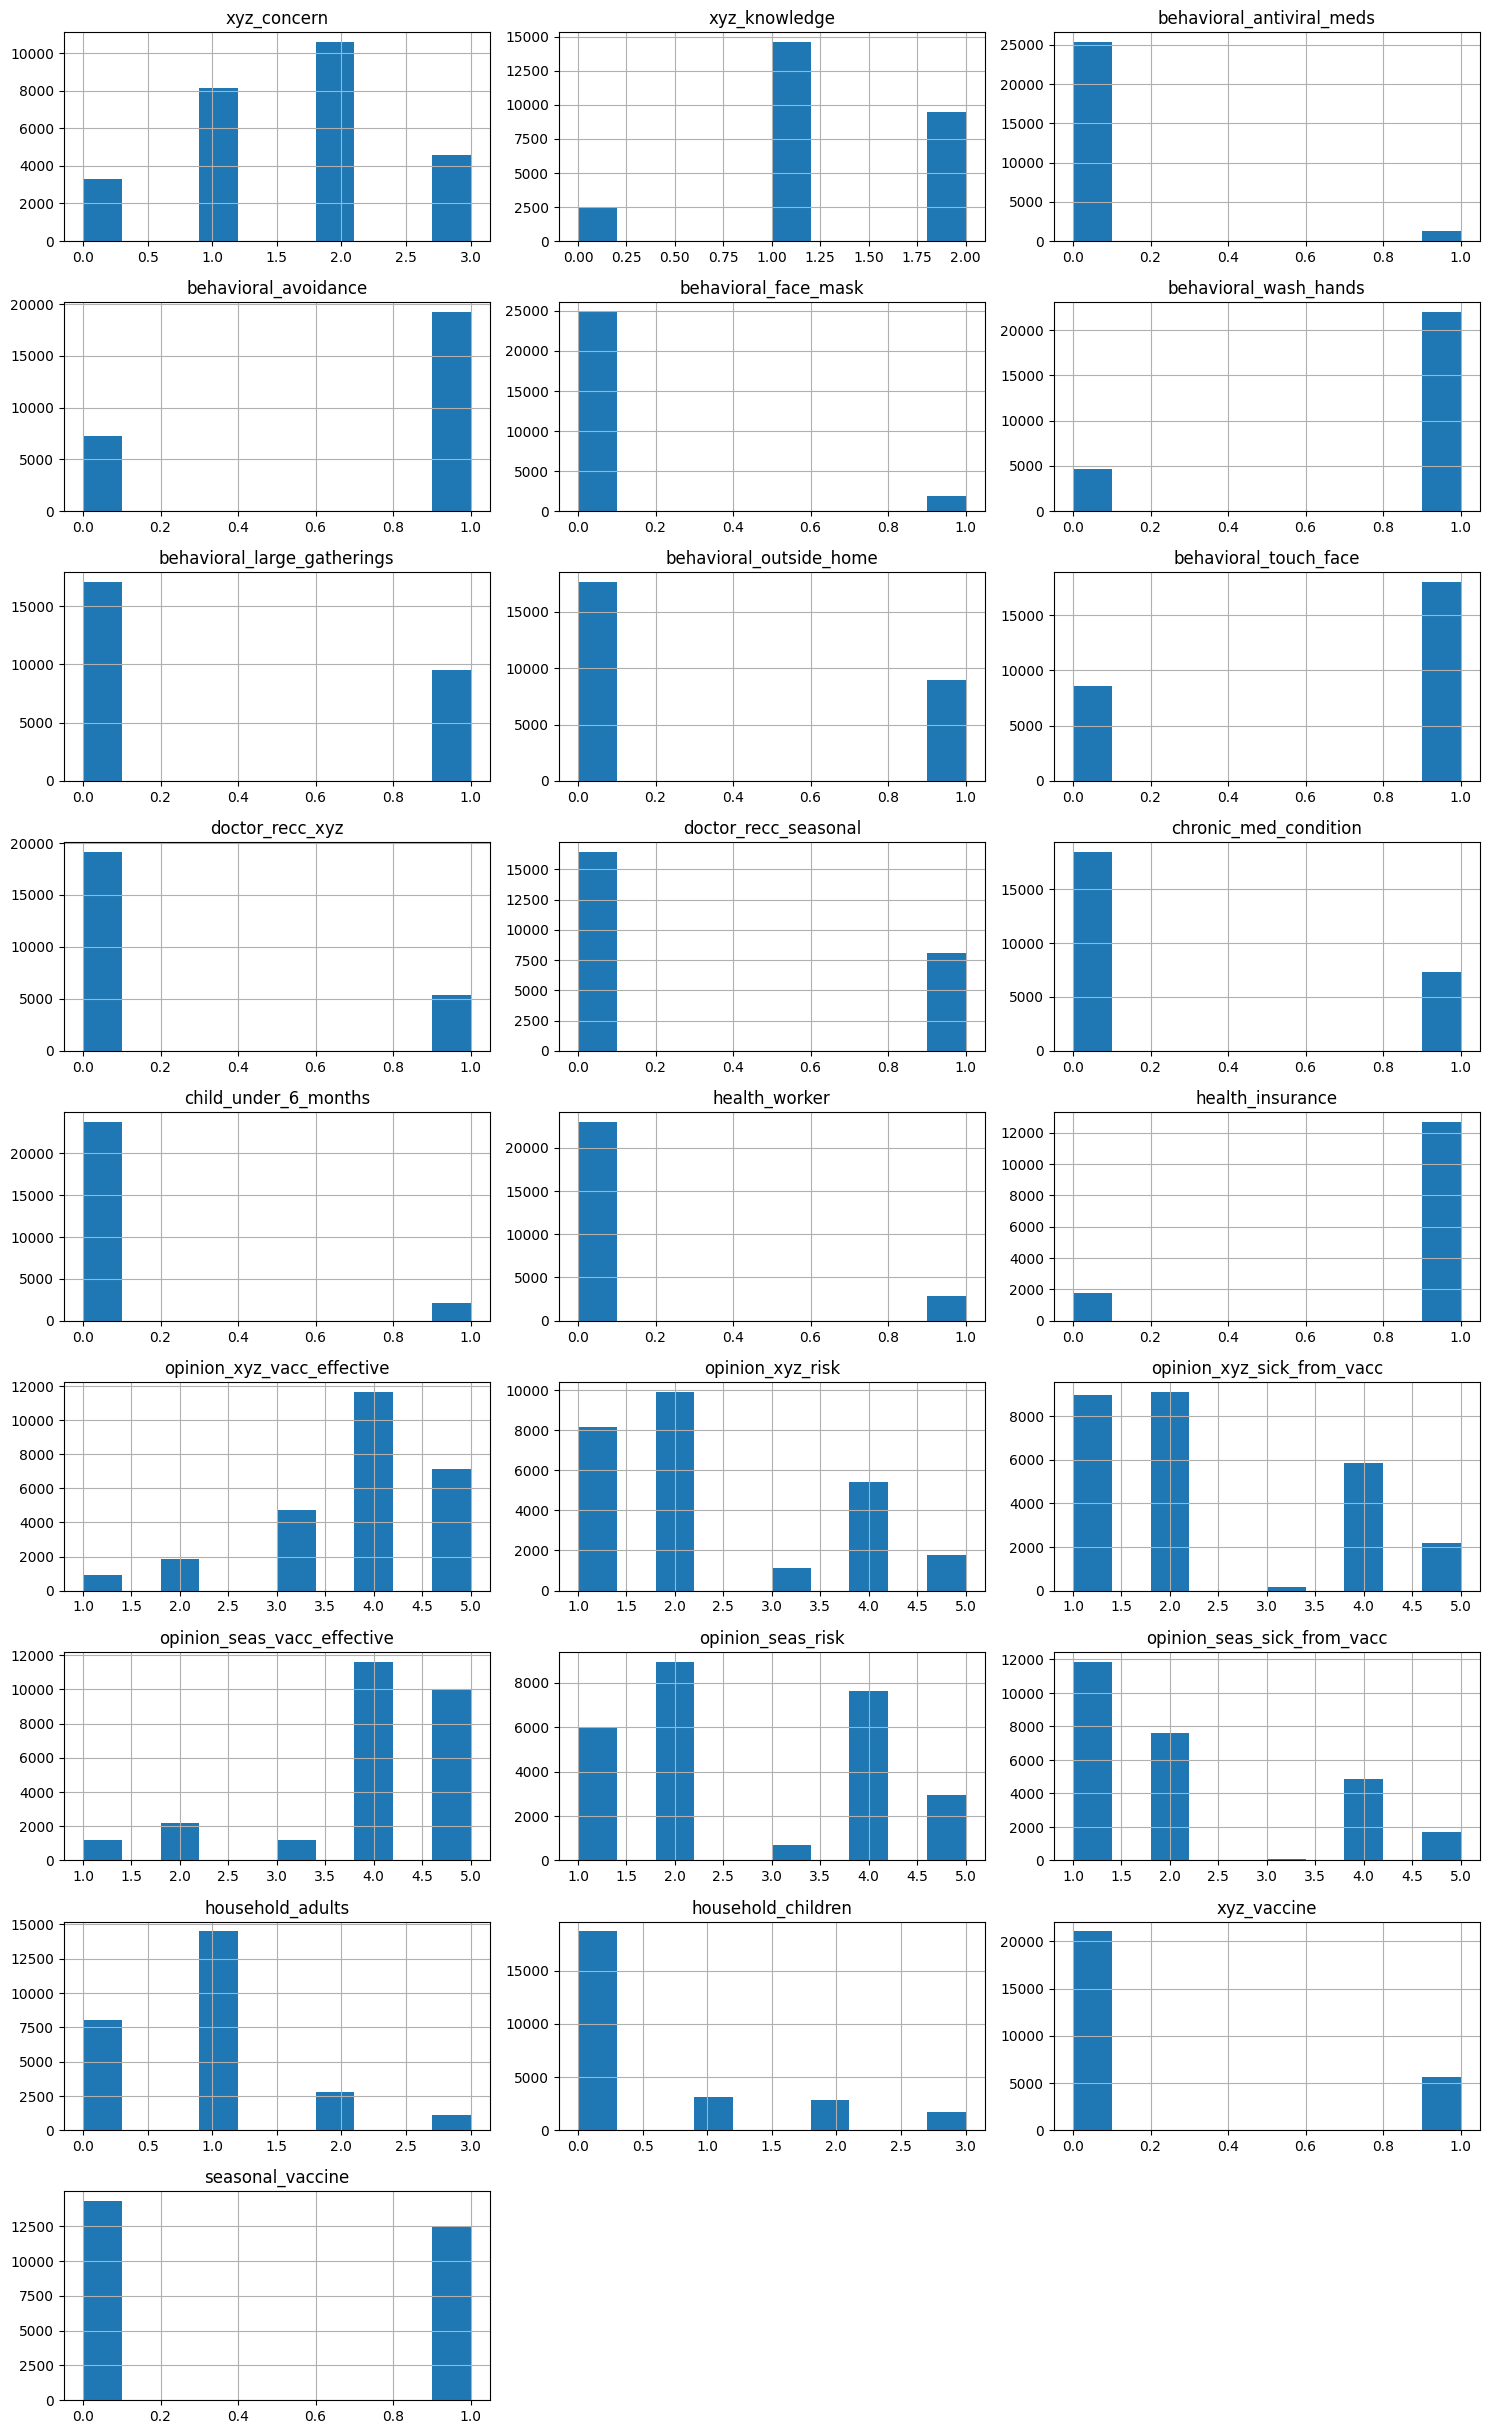

In [9]:
def draw_histograms(df, bins=10, figsize=(15, 35)):
    df.hist(bins=bins, figsize=figsize, layout=(len(df.columns) // 3 + 1, 3))
    plt.tight_layout()  
    plt.show()

draw_histograms(train_df)

In [10]:
train_df.skew(numeric_only=True)

xyz_concern                   -0.159913
xyz_knowledge                 -0.239224
behavioral_antiviral_meds      4.186503
behavioral_avoidance          -1.011306
behavioral_face_mask           3.401744
behavioral_wash_hands         -1.716380
behavioral_large_gatherings    0.589522
behavioral_outside_home        0.688227
behavioral_touch_face         -0.758355
doctor_recc_xyz                1.349742
doctor_recc_seasonal           0.724397
chronic_med_condition          0.962097
child_under_6_months           3.033008
health_worker                  2.462087
health_insurance              -2.334909
opinion_xyz_vacc_effective    -0.902706
opinion_xyz_risk               0.672957
opinion_xyz_sick_from_vacc     0.651281
opinion_seas_vacc_effective   -1.315177
opinion_seas_risk              0.250923
opinion_seas_sick_from_vacc    0.919587
household_adults               0.786572
household_children             1.543903
xyz_vaccine                    1.406022
seasonal_vaccine               0.137901


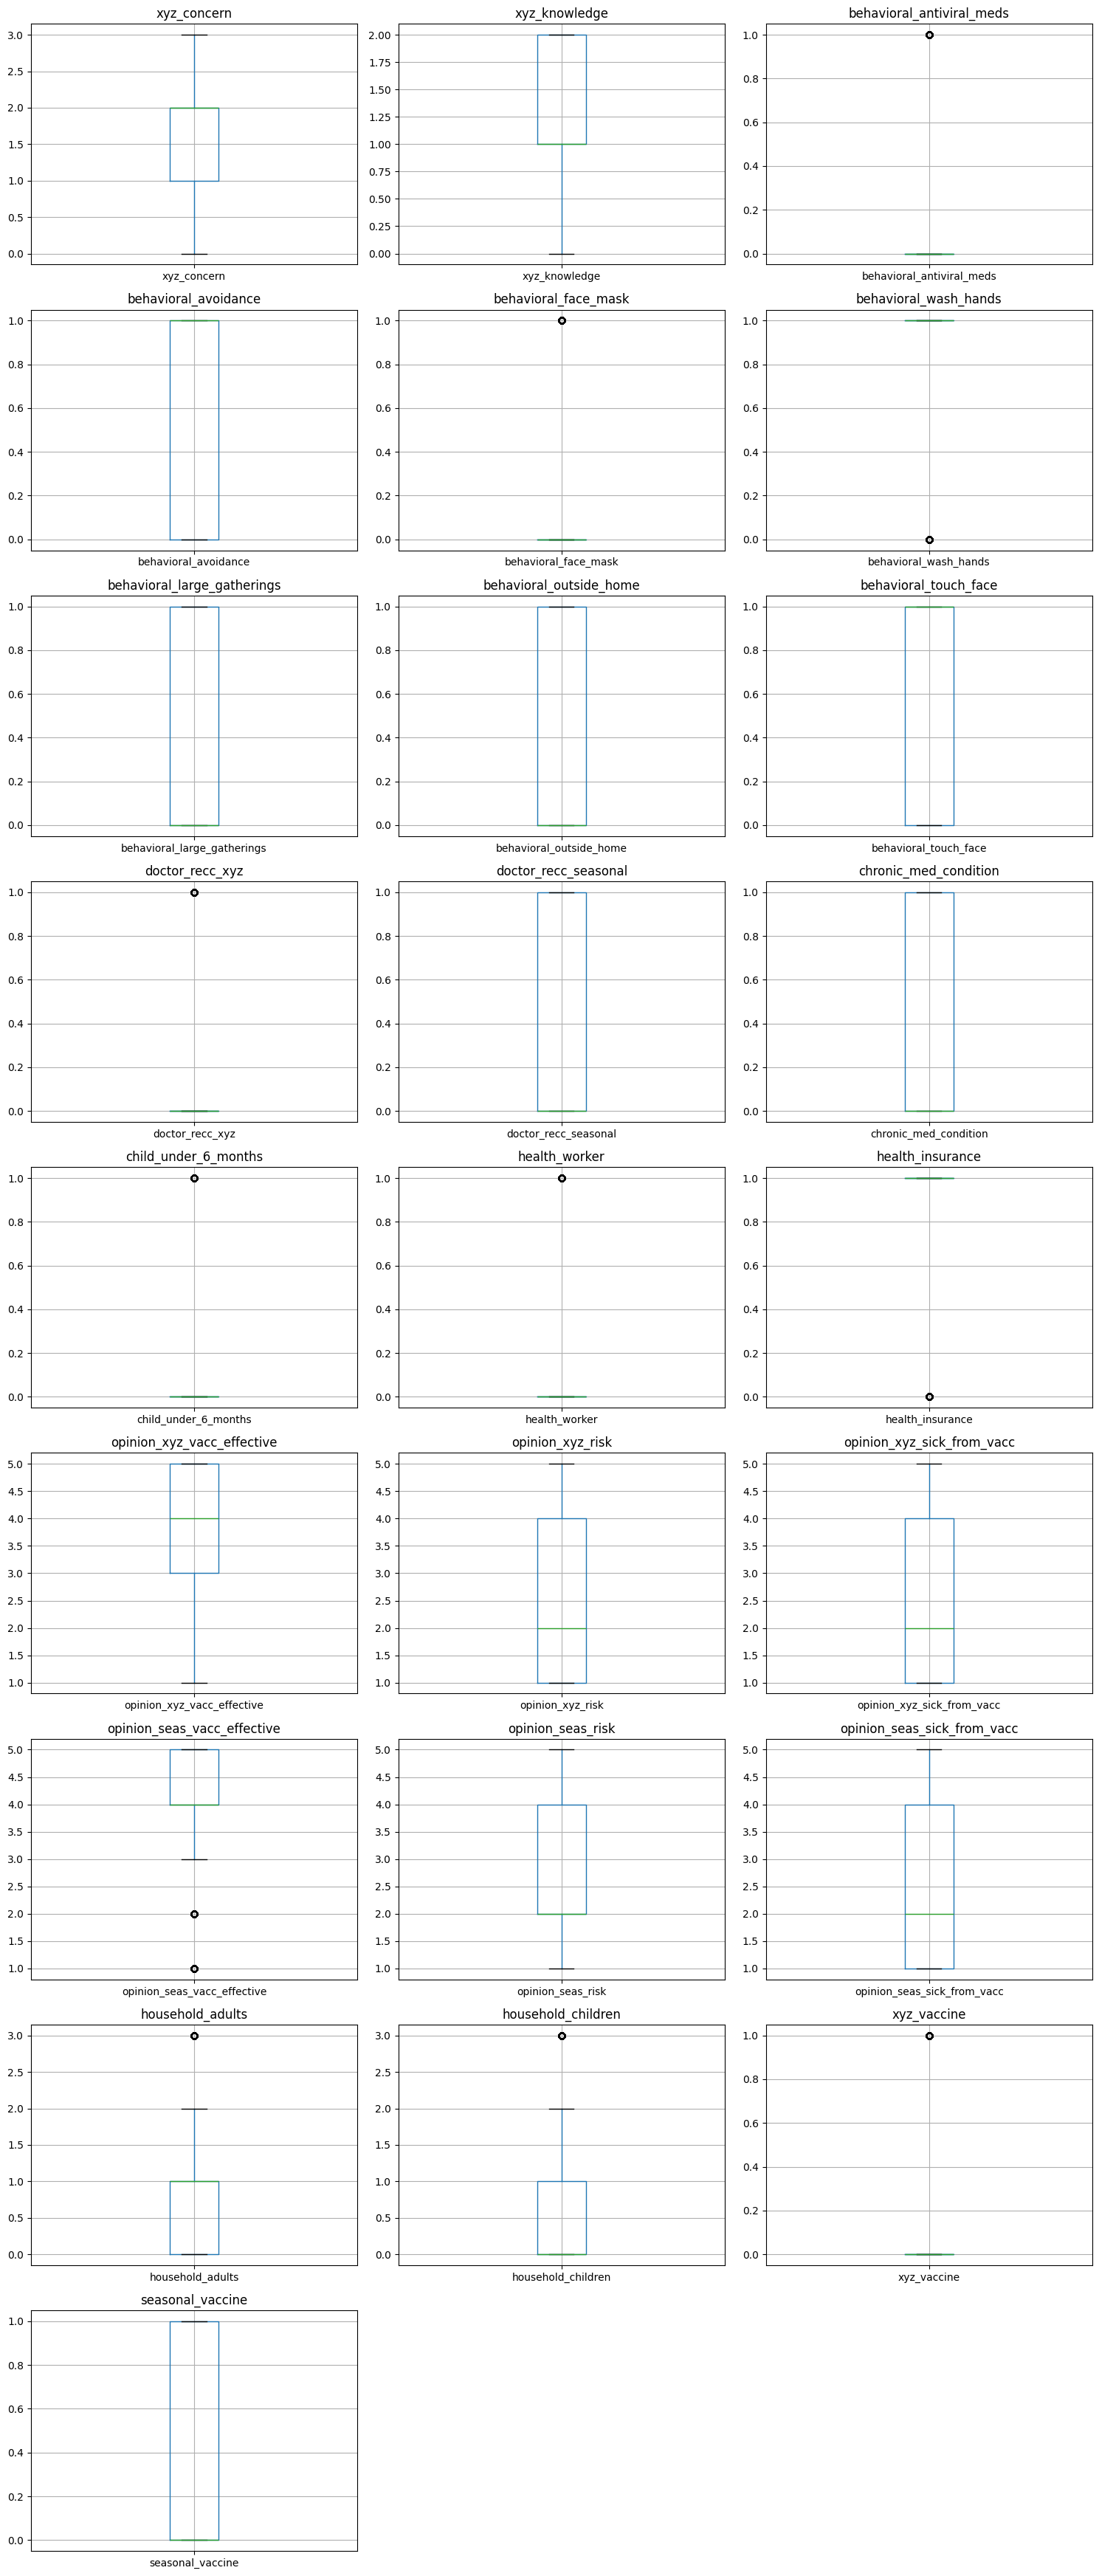

In [227]:
import matplotlib.pyplot as plt

def draw_boxplots(df, figsize=(15, 35)):
    numeric_df = df.select_dtypes(include=[np.number])
    num_columns = len(numeric_df.columns)
    rows = num_columns // 3 + 1
    fig, axes = plt.subplots(rows, 3, figsize=figsize)
    axes = axes.flatten()
    for i, col in enumerate(numeric_df.columns):
        numeric_df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(col)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()  
    plt.show()

draw_boxplots(train_df)

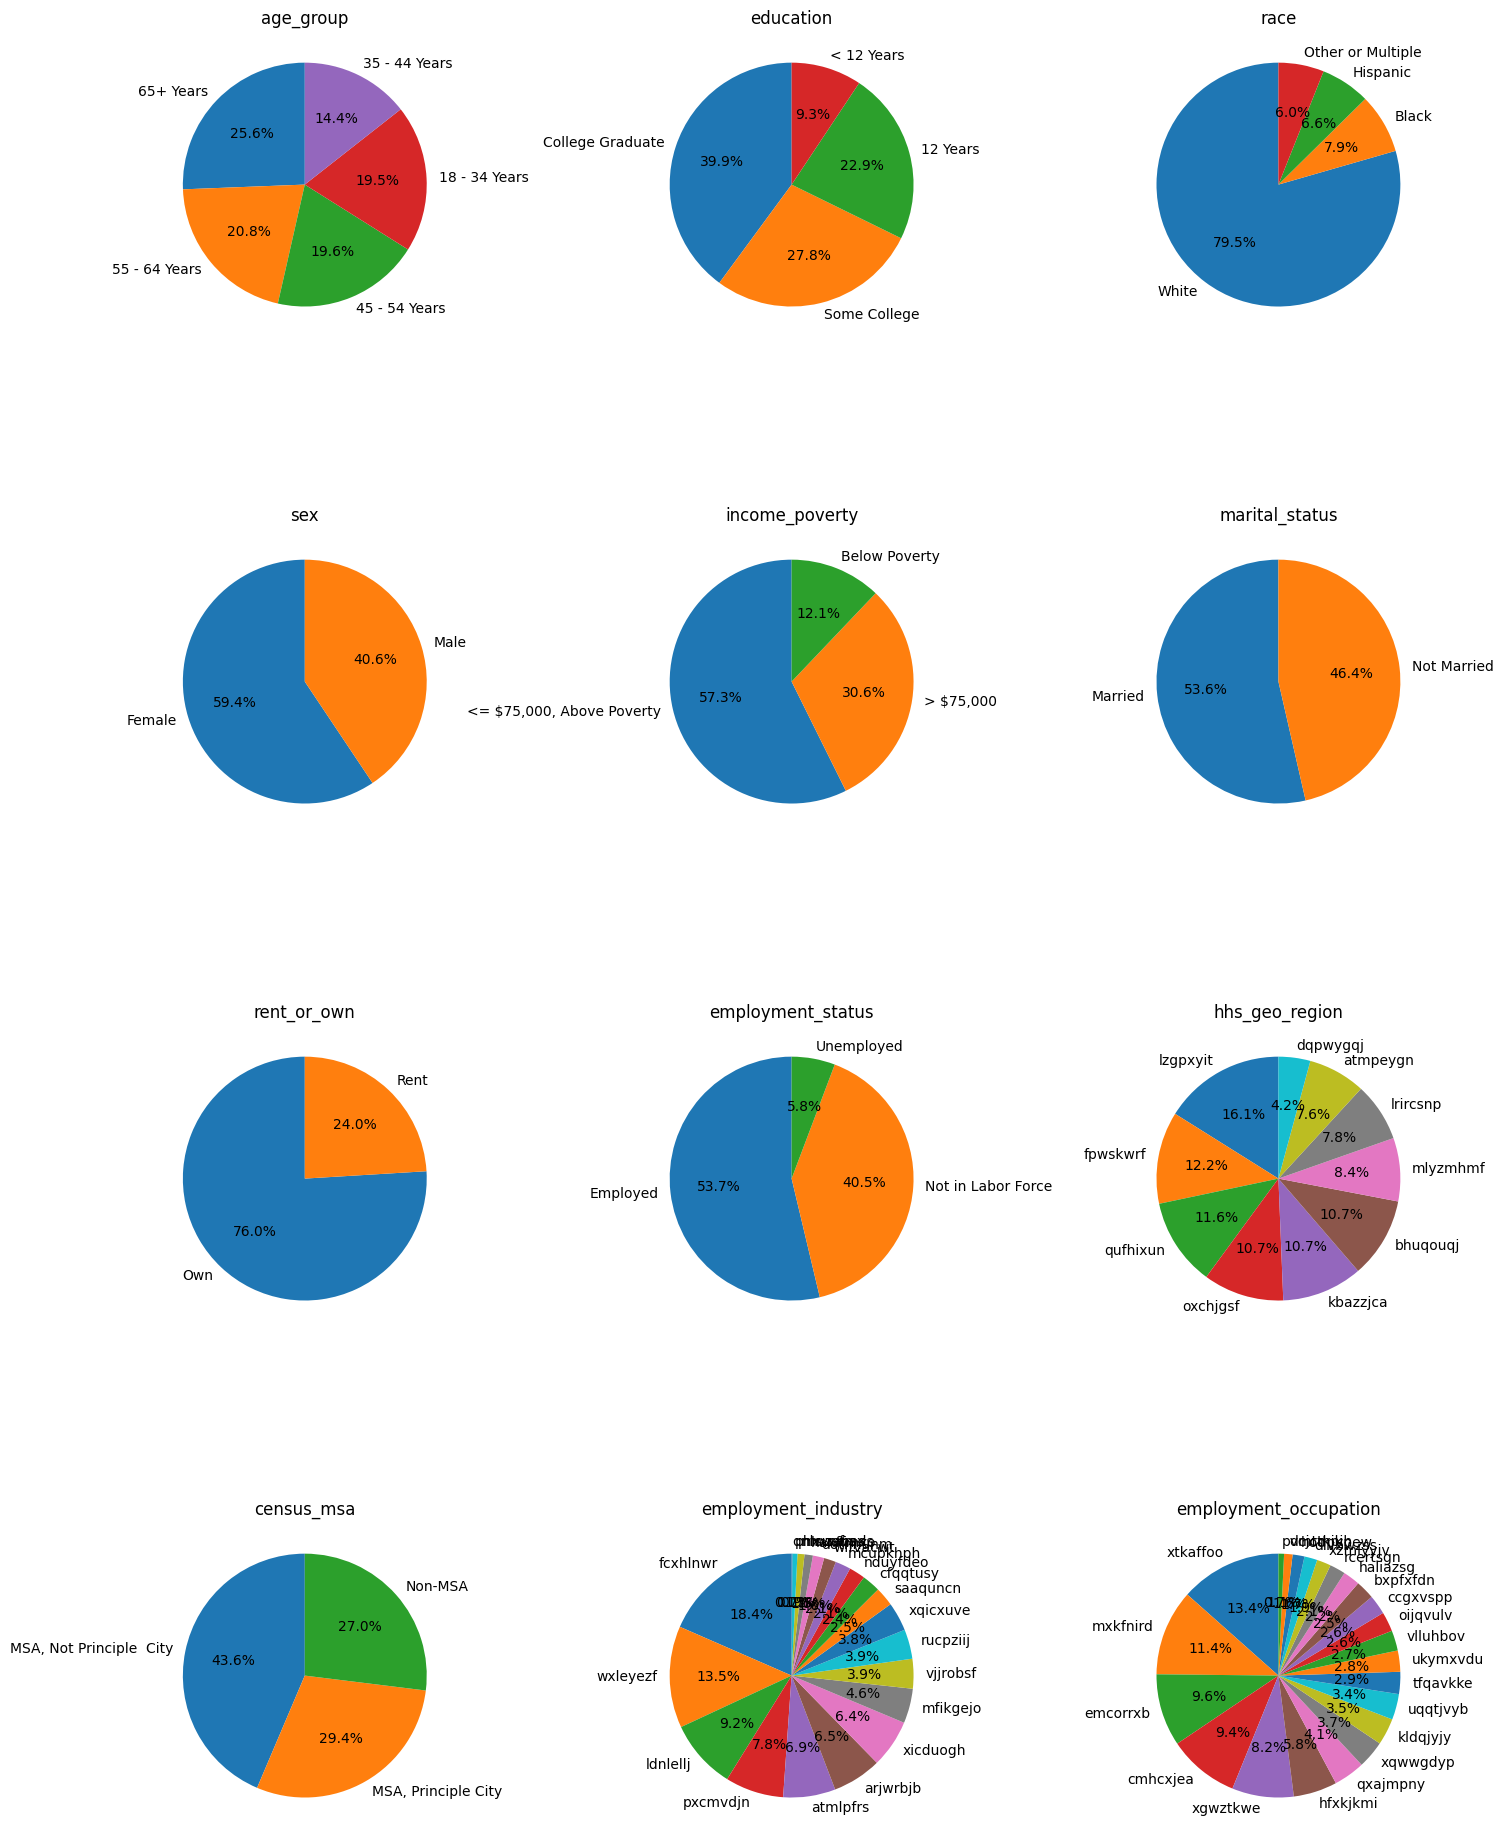

In [221]:
import matplotlib.pyplot as plt

def draw_piecharts(df, figsize=(15, 25)):
    categorical_df = df.select_dtypes(include=['object', 'category'])
    num_columns = len(categorical_df.columns)
    rows = num_columns // 3 + 1
    fig, axes = plt.subplots(rows, 3, figsize=figsize)
    axes = axes.flatten()
    for i, col in enumerate(categorical_df.columns):
        value_counts = categorical_df[col].value_counts()
        axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(col)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

draw_piecharts(train_df)

<h3>Handling Missing Values</h3>

In [234]:
train_df_c = train_df.copy()

<h5>Removing rows with greater than or equal to 12 missing values columns</h5>

In [84]:
def remove_rows_with_many_missing_values(df, threshold=12):
    return df[df.isnull().sum(axis=1) <= threshold]

train_df_c = remove_rows_with_many_missing_values(train_df_c)

In [85]:
train_df_c.isnull().sum()*100/len(train_df_c)

xyz_concern                     0.309823
xyz_knowledge                   0.416922
behavioral_antiviral_meds       0.260098
behavioral_avoidance            0.761169
behavioral_face_mask            0.065024
behavioral_wash_hands           0.133874
behavioral_large_gatherings     0.313647
behavioral_outside_home         0.302173
behavioral_touch_face           0.462821
doctor_recc_xyz                 7.561965
doctor_recc_seasonal            7.561965
chronic_med_condition           1.579712
child_under_6_months            0.994492
health_worker                   0.933293
health_insurance               44.794217
opinion_xyz_vacc_effective      0.355722
opinion_xyz_risk                0.175949
opinion_xyz_sick_from_vacc      0.053550
opinion_seas_vacc_effective     0.172124
opinion_seas_risk               0.137699
opinion_seas_sick_from_vacc     0.141524
age_group                       0.000000
education                       3.239749
race                            0.000000
sex             

<h5>Replacing replacing Missing values with 'most frequent' value using simple imputation </h5>

In [86]:
def impute_missing_values(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    num_imputer = SimpleImputer(strategy='most_frequent')
    df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
    
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
    
    return df

train_df_c = impute_missing_values(train_df_c)

<h5>No Missing Values</h5>

<Axes: >

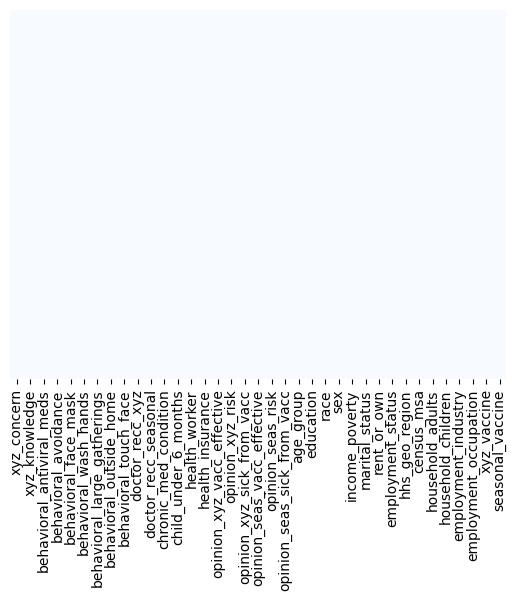

In [87]:
sns.heatmap(train_df_c.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=train_df_c.columns)

<h5>Data Preprocessing</h5>

In [88]:
def encode_all_categorical(df):
    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = le.fit_transform(df[column])
    return df

In [89]:
train_df_c = encode_all_categorical(train_df_c)

<h2>Bivariate Analysis</h2>

<h3>Conclusion</h3>

1. 'behavioral_antiviral_meds','health_insurance','behavioral_face_mask' are less important features. They need to be removed.

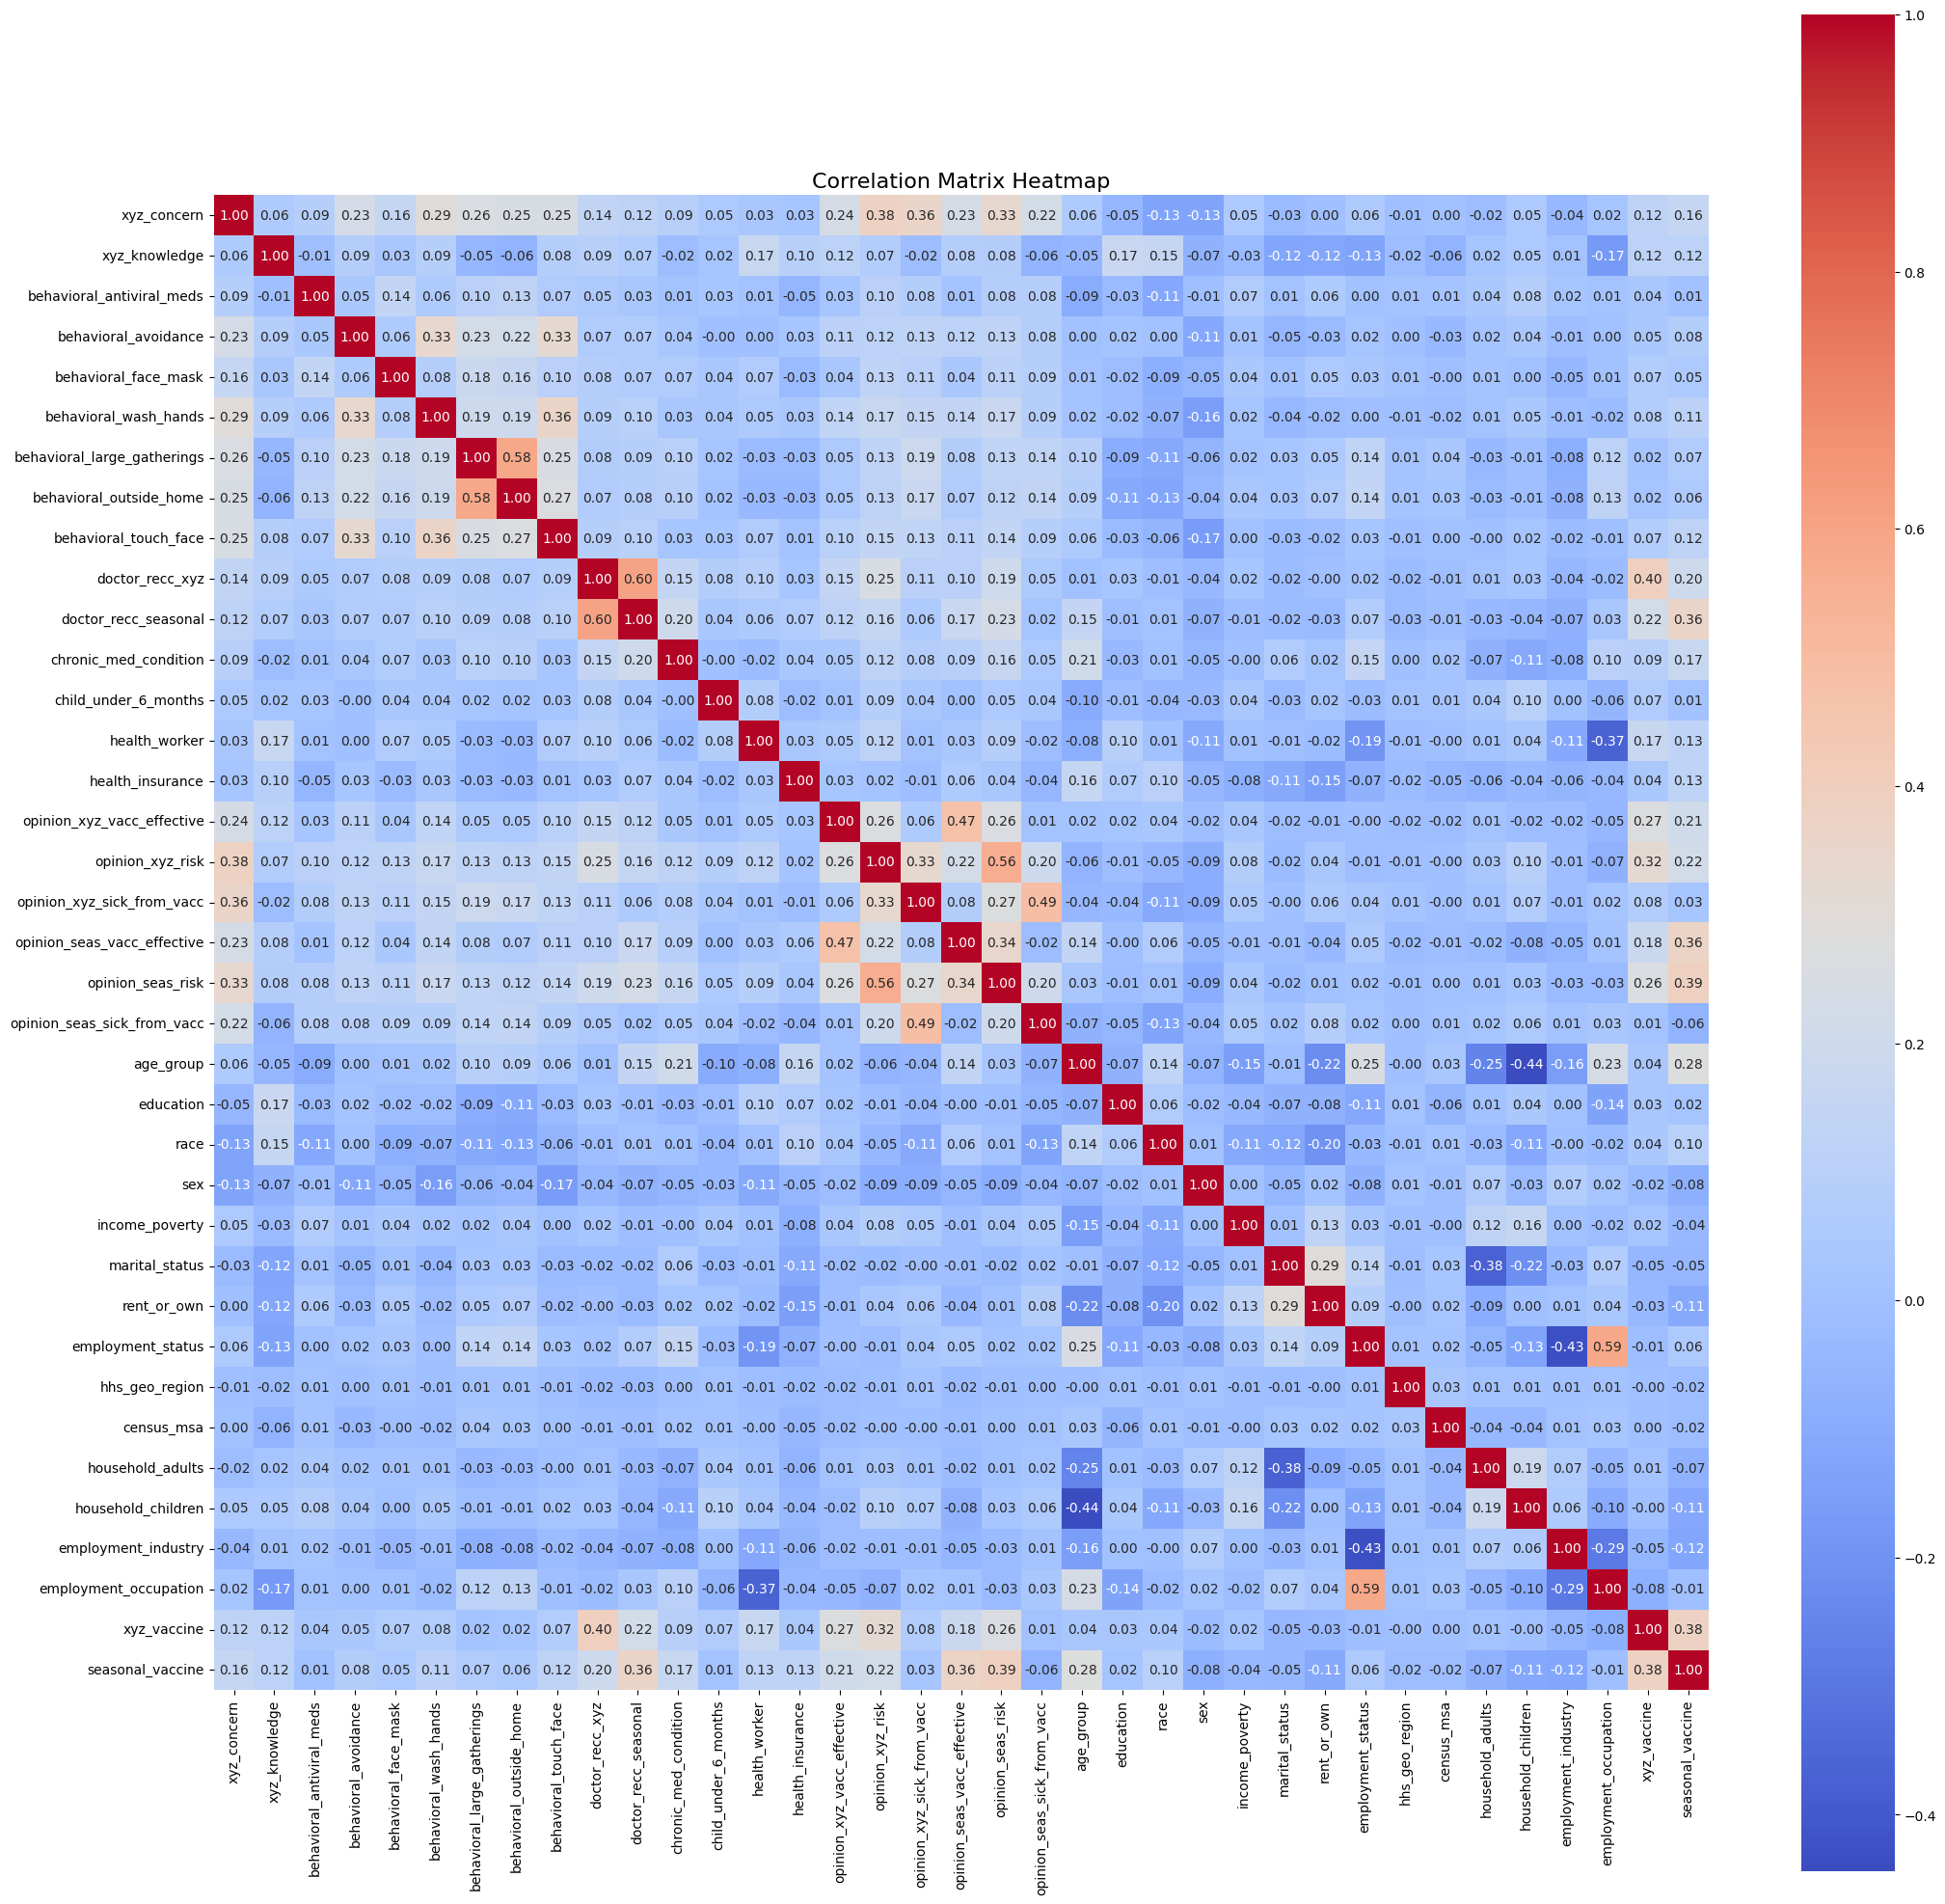

In [232]:
corr = train_df_c.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [233]:
plt.figure(figsize=(12,10))
sns.pairplot(train_df_c, diag_kind='kde')
plt.suptitle('Pairwise Relationships in Dataset')
plt.show()

<Figure size 1200x1000 with 0 Axes>

In [90]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=12)
X = train_df_c.drop(["xyz_vaccine","seasonal_vaccine"],axis=1)
y = train_df_c[['seasonal_vaccine','xyz_vaccine']]
wd = pd.get_dummies(train_df_c)
model.fit(X, y)
display(model.feature_importances_)

array([0.02068385, 0.01824399, 0.0051298 , 0.00697284, 0.00566379,
       0.00582739, 0.00712556, 0.00706653, 0.00791381, 0.09551022,
       0.0886774 , 0.00966512, 0.00577949, 0.02389658, 0.0048702 ,
       0.03993482, 0.03598623, 0.02080662, 0.09043893, 0.17781141,
       0.02523961, 0.05898501, 0.01985564, 0.01758108, 0.00874954,
       0.01349982, 0.0082791 , 0.00863477, 0.00814762, 0.03803874,
       0.01600343, 0.01668568, 0.014353  , 0.0304271 , 0.03751525])

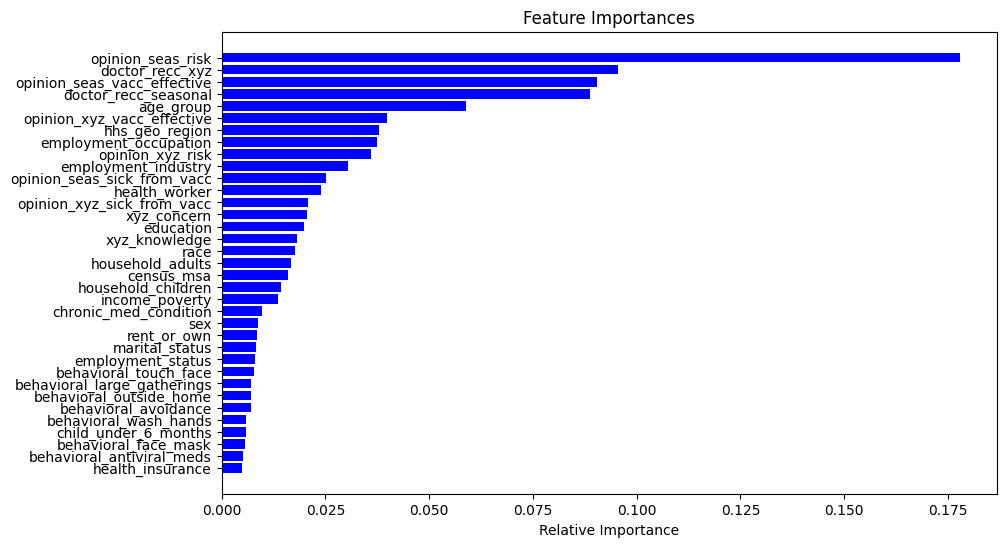

In [91]:
features = wd.columns
importances = model.feature_importances_
indices = np.argsort(importances)[:]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [200]:
X = train_df_c.drop(["xyz_vaccine","seasonal_vaccine","behavioral_antiviral_meds","health_insurance","behavioral_face_mask"],axis=1)
y = train_df_c[['xyz_vaccine','seasonal_vaccine']]

In [201]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state= 3)

Standardization of dataset

In [235]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h4>Model Training</h4>

In [203]:
base_clf = LogisticRegression()
multi_target_clf = MultiOutputClassifier(base_clf, n_jobs=-1)
multi_target_clf.fit(X_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression(), n_jobs=-1)

<h5>Making Predictions</h5>
<h4>ROC AUC Score: 84.83%</h4>

Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

     Label 1       0.70      0.43      0.53      1723
     Label 2       0.79      0.75      0.77      3726

   micro avg       0.77      0.65      0.70      5449
   macro avg       0.75      0.59      0.65      5449
weighted avg       0.76      0.65      0.69      5449
 samples avg       0.35      0.33      0.34      5449

ROC AUC scores: 0.8483321307198235
Confusion Matrices:
[[[5805  316]
  [ 981  742]]

 [[3373  745]
  [ 943 2783]]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


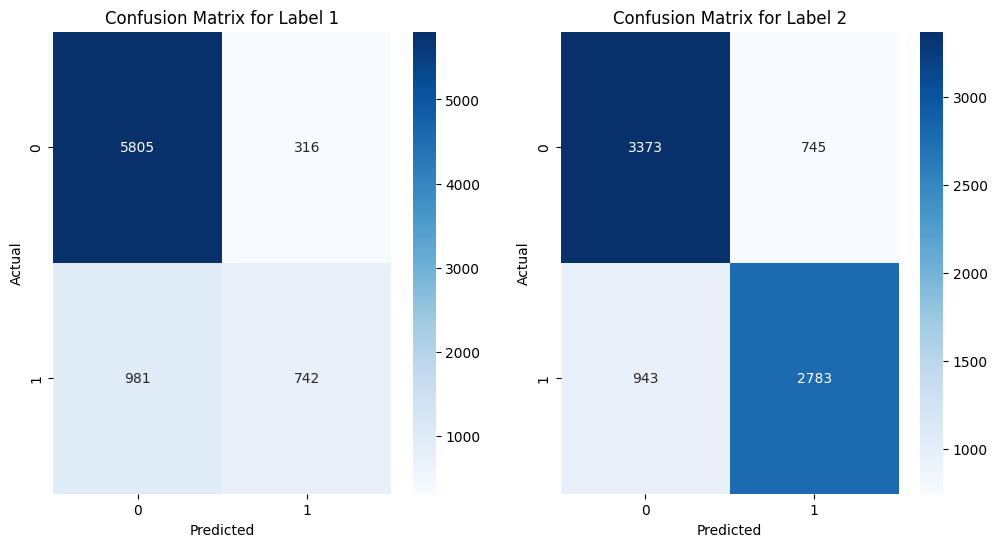

In [204]:
# Make predictions on the test set
y_pred = multi_target_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report for each output
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Label 1', 'Label 2']))

# Compute the ROC AUC score for each output
y_pred_proba = multi_target_clf.predict_proba(X_test)
y_pred_proba = np.transpose([pred[:, 1] for pred in y_pred_proba])
roc_auc_scores = roc_auc_score(y_test, y_pred_proba, average="macro")
print(f"ROC AUC scores: {roc_auc_scores}")

# Confusion matrix for each label
from sklearn.metrics import multilabel_confusion_matrix
conf_matrices = multilabel_confusion_matrix(y_test, y_pred)
print("Confusion Matrices:")
print(conf_matrices)

# Plotting the confusion matrices
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i in range(2):
    sns.heatmap(conf_matrices[i], annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Confusion Matrix for Label {i+1}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.show()


In [256]:
test_df = pd.read_csv('/Users/anjalibharti/Downloads/dataset and all/test_set_features.csv')
test_df.head()

respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0          26707          2.0            2.0                        0.0   
1          26708          1.0            1.0                        0.0   
2          26709          2.0            2.0                        0.0   
3          26710          1.0            1.0                        0.0   
4          26711          3.0            1.0                        1.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   1.0                   0.0                    1.0   
1                   0.0                   0.0                    0.0   
2                   0.0                   1.0                    1.0   
3                   0.0                   0.0                    0.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          1.0                      0.0   
1                          0.0                      0.0   
2                          1.0                      1.0   
3                          0.0                      0.0   
4                          1.0                      1.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...                  > $75,000     Not Married   
1                    0.0  ...              Below Poverty     Not Married   
2                    1.0  ...                  > $75,000         Married   
3                    0.0  ...  <= $75,000, Above Poverty         Married   
4                    1.0  ...  <= $75,000, Above Poverty     Not Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0         Rent            Employed        mlyzmhmf  MSA, Not Principle  City   
1         Rent            Employed        bhuqouqj                   Non-MSA   
2          Own            Employed        lrircsnp                   Non-MSA   
3          Own  Not in Labor Force        lrircsnp  MSA, Not Principle  City   
4          Own            Employed        lzgpxyit                   Non-MSA   

   household_adults  household_children  employment_industry  \
0               1.0                 0.0             atmlpfrs   
1               3.0                 0.0             atmlpfrs   
2               1.0                 0.0             nduyfdeo   
3               1.0                 0.0                  NaN   
4               0.0                 1.0             fcxhlnwr   

   employment_occupation  
0               hfxkjkmi  
1               xqwwgdyp  
2               pvmttkik  
3                    NaN  
4               mxkfnird  

[5 rows x 36 columns]

In [271]:
respondent_ids = test_df['respondent_id']
test_df_c = test_df.drop("respondent_id", axis =1)

In [272]:
test_df_c = remove_rows_with_many_missing_values(test_df_c)

In [273]:
test_df_c = impute_missing_values(test_df_c)

<Axes: >

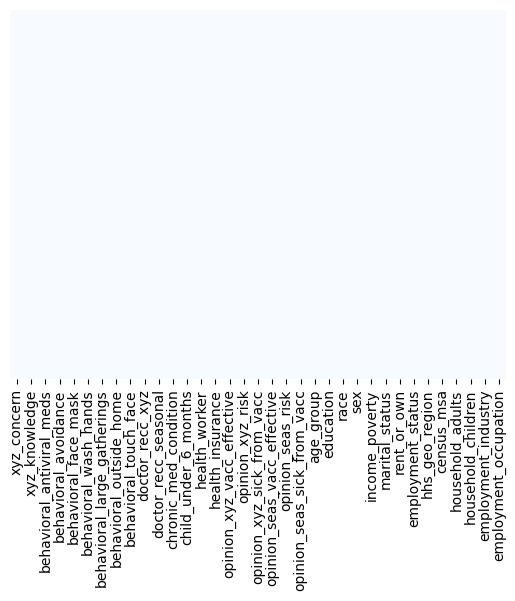

In [274]:
sns.heatmap(test_df_c.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=test_df_c.columns)

In [275]:
test_df_c = encode_all_categorical(test_df_c)

In [279]:
X_pred = test_df_c.drop(["behavioral_antiviral_meds","health_insurance","behavioral_face_mask"],axis=1)
X_pred = sc.fit_transform(X_pred)

In [280]:
predictions = multi_target_clf.predict(X_pred)
predictions_df = pd.DataFrame(predictions, columns=['h1n1_vaccine', 'seasonal_vaccine'])
predictions_df.insert(0, 'respondent_id', respondent_ids)
predictions_df.to_csv('predictions.csv', index=False)